In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [13]:
train_df = pd.read_csv('cleaned_train.csv')
val_df = pd.read_csv('cleaned_val.csv')
test_df = pd.read_csv('cleaned_test.csv')

In [14]:
print("Train shape:", train_df.shape)
print("Validation shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (11863, 9)
Validation shape: (230, 9)
Test shape: (186, 9)


In [15]:
print("\nMissing values:")
print(train_df.isnull().sum())


Missing values:
id                  0
dialogue            0
summary             0
topic               0
cleaned_dialogue    0
tokens              0
dialogue_length     0
summary_length      0
topic_encoded       0
dtype: int64


In [29]:
print("\nSample topics:", train_df['topic'].unique()[:25])


Sample topics: ['get a check-up' 'vaccines' 'find keys' 'have a girlfriend' 'dance'
 'birthday' 'pay the fare' 'a job application' 'a computer package'
 'a visa' 'do a favor' 'a copy' 'sexual harrassment' 'age' 'music'
 'be confused' "Valentine's Day" 'triplets' 'ice cream' 'work together'
 'get dressed' 'check in' 'a mover' 'break up' 'a movie']


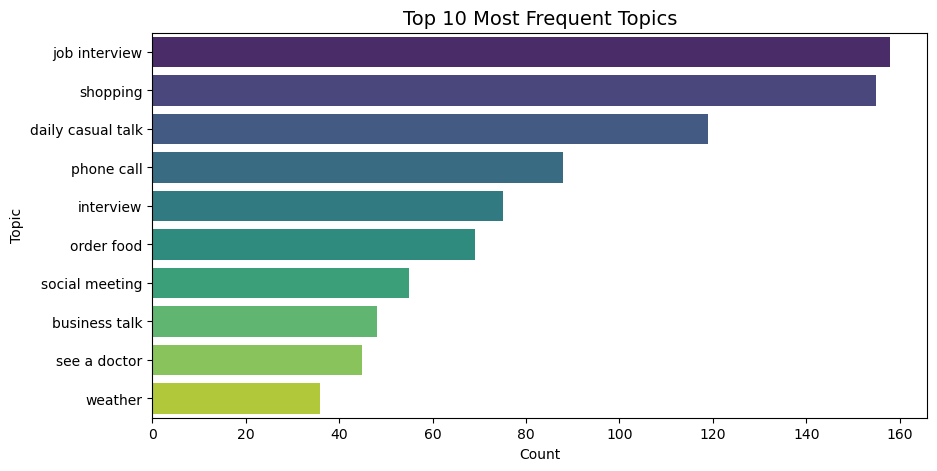

In [17]:
plt.figure(figsize=(10,5))
top_topics = train_df['topic'].value_counts().head(10)

sns.barplot(x=top_topics.values, y=top_topics.index, palette='viridis')
plt.title('Top 10 Most Frequent Topics', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()


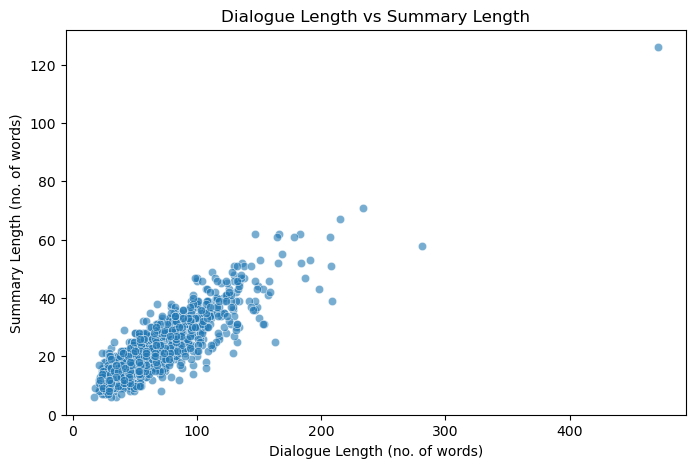

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train_df.sample(1000, random_state=42), x='dialogue_length', y='summary_length', alpha=0.6)
plt.title('Dialogue Length vs Summary Length')
plt.xlabel('Dialogue Length (no. of words)')
plt.ylabel('Summary Length (no. of words)')
plt.show()


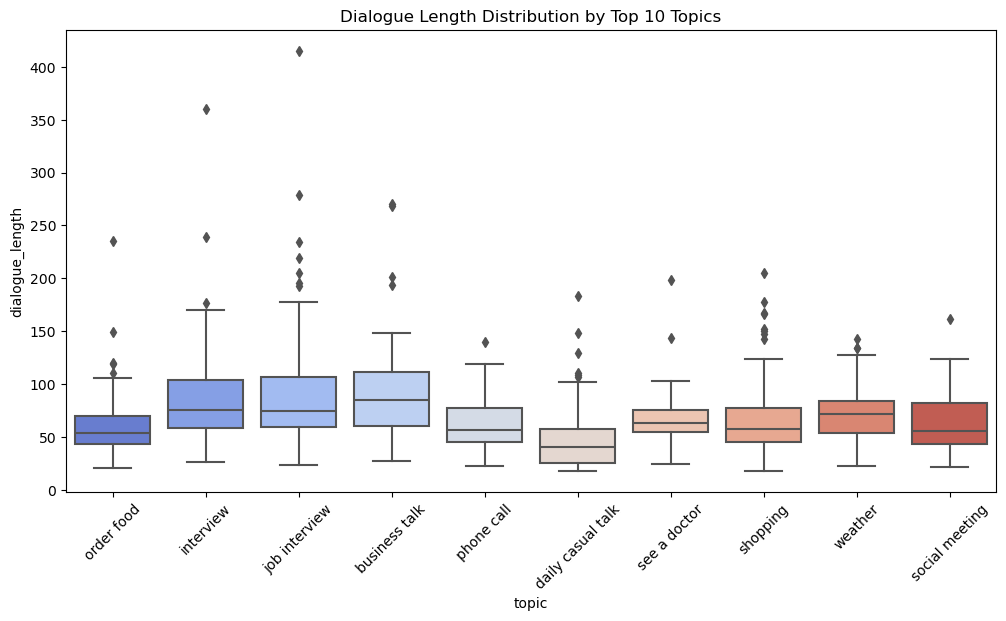

In [19]:
top_topics = train_df['topic'].value_counts().head(10).index
subset = train_df[train_df['topic'].isin(top_topics)]

plt.figure(figsize=(12,6))
sns.boxplot(data=subset, x='topic', y='dialogue_length', palette='coolwarm')
plt.title('Dialogue Length Distribution by Top 10 Topics')
plt.xticks(rotation=45)
plt.show()


In [23]:
all_words = ' '.join(train_df['cleaned_dialogue']).split()
filtered_words = [w for w in all_words if w != 'speaker']
word_freq = Counter(filtered_words)
most_common = dict(word_freq.most_common(15))

C:\Users\alana\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


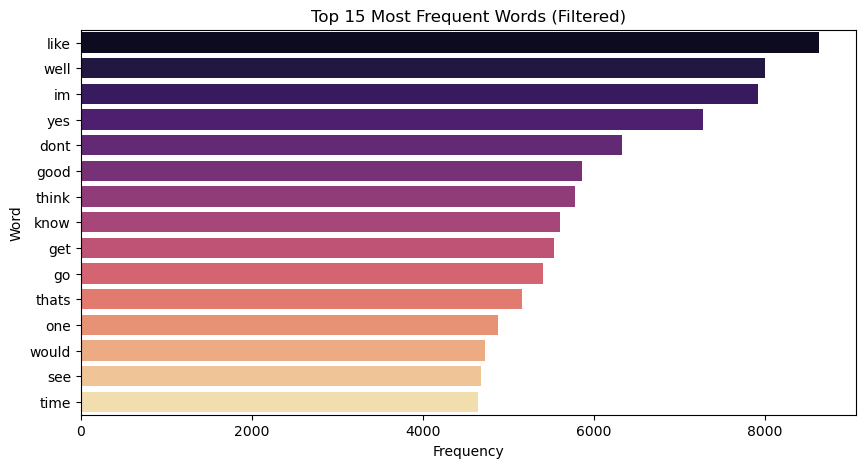

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(most_common.values()), y=list(most_common.keys()), palette='magma')
plt.title('Top 15 Most Frequent Words (Filtered)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [21]:
correlation = train_df['dialogue_length'].corr(train_df['summary_length'])
print(f"Correlation between dialogue and summary length: {correlation:.2f}")

Correlation between dialogue and summary length: 0.86


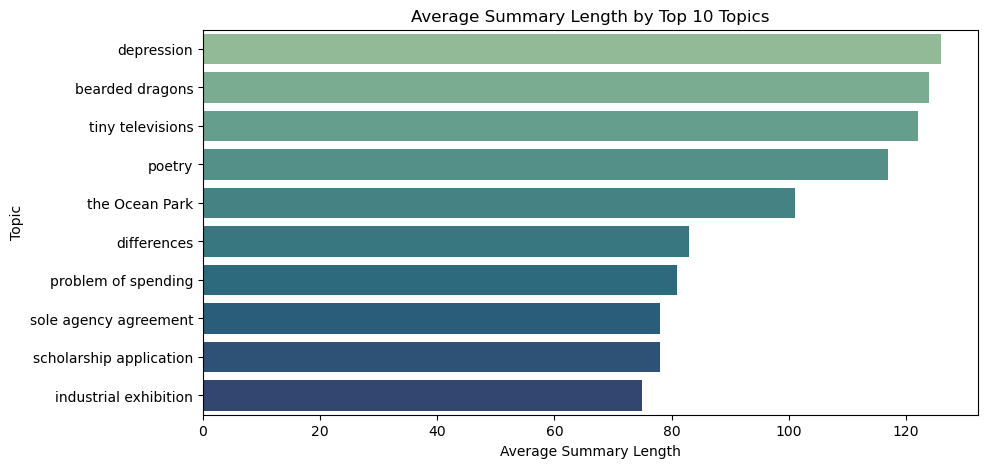

In [22]:
avg_len = train_df.groupby('topic')['summary_length'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_len.values, y=avg_len.index, palette='crest')
plt.title('Average Summary Length by Top 10 Topics')
plt.xlabel('Average Summary Length')
plt.ylabel('Topic')
plt.show()
